In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

In [2]:
def max_abs_scale(series):
    return series / series.abs().max()

image_order = ["500b", "100Kb", "256Kb", "1Mb", "15Mb"]
model_order = ["resnet18", "resnet34", "resnet50", "resnet152"]


dfe = pd.read_csv("result/energy.csv")

dfm = pd.read_csv("result/result.csv")  


Energy data frame pre-processing 

In [3]:
energy_features = [
    "cpu0_core_joules"
]

# dfte : Data Frame Total Energy 
dfte = (
    dfe.copy()
    .assign(
        energy=lambda df: df[energy_features].sum(axis=1)
    )
    .groupby(['model', 'image'], as_index=False)['energy']
    .agg(std_energy='std', mean_energys='mean')
    .assign(
        # mean_energys=lambda df: df.groupby('image')['mean_energys'].transform(max_abs_scale),
        # image=lambda df: pd.Categorical(df['image'], categories=image_order, ordered=True),
        model=lambda df: pd.Categorical(df['model'], categories=model_order, ordered=True),
        
    )
    .sort_values(['model', 'image'])
)

libraries = dfte['model'].unique() # Define the libraries and image sizes
sizes = dfte['image'].unique()

dfte.head()

,model,image,std_energy,mean_energys
5,resnet18,100Kb,56.799918,63.764604
6,resnet18,15Mb,55.447765,115.780887
7,resnet18,1Mb,56.727386,65.298366
8,resnet18,256Kb,10.504259,48.956001
9,resnet18,500b,0.444247,44.018427


In [4]:
dfw = dfte[dfte['image'] == '256Kb']

 
dfw.head()


,model,image,std_energy,mean_energys
8,resnet18,256Kb,10.504259,48.956001
13,resnet34,256Kb,3.890784,82.323621
18,resnet50,256Kb,14.718939,87.073569
3,resnet152,256Kb,41.974527,210.183637


In [5]:
def bar_ax_style(ax, ylabel, xlabel):
    
    """_summary_

    Returns:
        _type_: _description_
    """
    ax.set_ylabel(ylabel , fontsize=10, labelpad=12)  # Set the labels and title
    ax.set_xlabel(xlabel , fontsize=10, labelpad=12)  # Set the labels and title
    
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)
    
    return ax

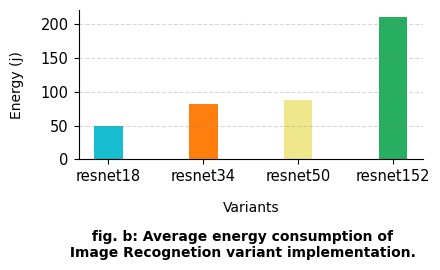

In [8]:
bar_colors = ['#17becf', '#ff7f0e', '#f0e68c', '#27ae60', '#ee9f6e']
 

fig, ax = plt.subplots(figsize=(4.5, 2.8))  

ax.bar(
        dfw['model'], dfw['mean_energys'], 
        width=0.3, 
        color=bar_colors
    )

ax = bar_ax_style(ax, "Energy (j)", "Variants")

ax.tick_params(axis='both', which='major', labelsize=10.5)

fig.suptitle(""" fig. b: Average energy consumption of \n Image Recognetion variant implementation. """
             , y=0, x=0.55, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
 
 